In [15]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt

In [82]:
df1 = pd.read_csv('comments_1606179622375.csv')
df2 = pd.read_csv('comments_1606179661375.csv')
df3 = pd.read_csv('comments_1606179740255.csv')

df = pd.concat([df1,df2,df3])
df["Word Count"] = df['text'].str.split().apply(len)
# Character Length
df["Character Count"] = df['text'].apply(len)

In [83]:
df.drop(['id','did_report_as_spam','owner.profile_pic_url'],axis=1)
df.sample(3)

,id,text,created_at,did_report_as_spam,owner.id,owner.is_verified,owner.profile_pic_url,owner.username,likes,comments,Word Count,Character Count
5,18027862459031933,Qué talla son?,1547853438,False,212317551,False,https://instagram.fscl11-1.fna.fbcdn.net/v/t51...,ange.estefania,1,0,3,14
4,17913779869292715,Traigan tallas grandes 💕,1553131128,False,2236554129,False,https://instagram.fscl11-1.fna.fbcdn.net/v/t51...,gita.mali.paz,0,1,4,24
5,17854569634271871,Valor !!,1529453186,False,284558271,False,https://instagram.fscl11-1.fna.fbcdn.net/v/t51...,marijoval_,1,1,2,8


In [59]:
df.shape

(27, 10)

In [ ]:

stop_words_sp = set(stopwords.words('spanish'))
stopwords = set(stop_words_sp)
size = (10,7)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes:
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1

    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))

    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()

# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

Nube de palabras clientas

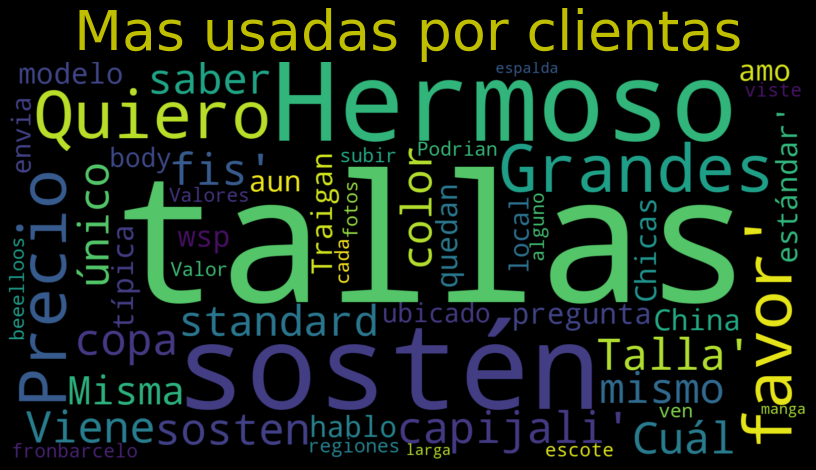

In [81]:
title = 'Mas usadas por clientas'
temp = df['text']

new_stop = set(stopwords)
new_stop.update([x.lower() for x in list(df['text'][df['text'].notnull()].unique())] + ['tulipantienda','hola','holaa','talla','Talla'])

cloud(text= temp.values, title=title, stopwords=new_stop)

In [84]:
print("\nTotal conteo de palabras es: {}".format(df["Word Count"].sum()))
print("Total conteo de letras es: {}".format(df["Character Count"].sum()))
df[["Word Count","Character Count"]].describe().T


Total conteo de palabras es: 137
Total conteo de letras es: 736


,count,mean,std,min,25%,50%,75%,max
Word Count,27.0,5.074074,2.934227,1.0,3.0,4.0,6.5,12.0
Character Count,27.0,27.259259,15.542974,5.0,16.0,27.0,36.5,58.0


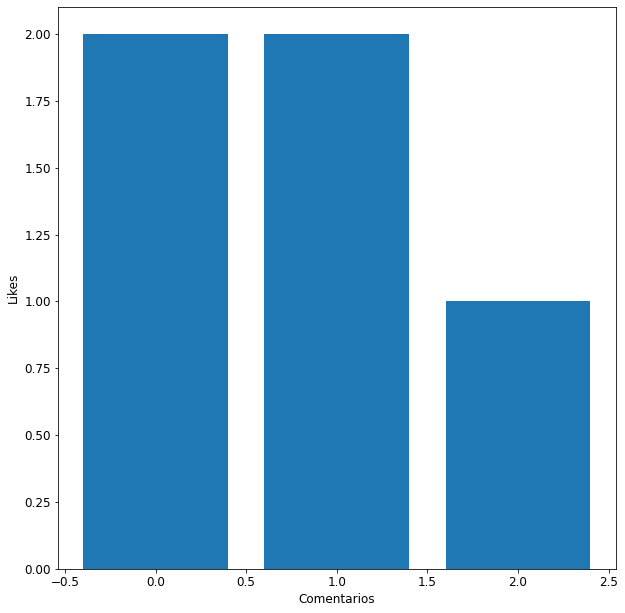

In [97]:
plt.bar(x='comments', height='likes' ,data= df)
plt.xlabel('Comentarios')
plt.ylabel('Likes')
plt.show()


In [ ]:
Tienda

In [92]:
df4 = pd.read_csv('tulipantienda_1606750668253.csv')
df4.drop(['comments_disabled','location'],axis=1)
df4.sample(3)

,id,shortcode,type,is_video,dimension.height,dimension.width,display_url,thumbnail_src,owner.id,owner.username,description,comments,likes,comments_disabled,taken_at_timestamp,location,hashtags,mentions,views,video_url
0,2447410917575837899,CH280M5hUjL,GraphImage,False,750,750,https://instagram.fscl11-1.fna.fbcdn.net/v/t51...,https://instagram.fscl11-1.fna.fbcdn.net/v/t51...,3171248026,tulipantienda,🌷Bellas para todas las que agenden para los en...,0,7,False,1605974138,NaN,[],[],NaN,NaN
17,2414956898953948385,CGDpoEuB2zh,GraphSidecar,False,1080,1080,https://instagram.fscl11-1.fna.fbcdn.net/v/t51...,https://instagram.fscl11-1.fna.fbcdn.net/v/t51...,3171248026,tulipantienda,🌷Bralette con broche $5.000🌷\nDisponible en bl...,0,45,False,1602105317,NaN,[],[],NaN,NaN
15,2415811599693981823,CGGr9m0Byh_,GraphImage,False,640,640,https://instagram.fscl11-2.fna.fbcdn.net/v/t51...,https://instagram.fscl11-2.fna.fbcdn.net/v/t51...,3171248026,tulipantienda,🌷Bralette encaje con broche $5.000 🌷 \nDisponi...,2,22,False,1602207206,NaN,[],[],NaN,NaN


Mas gustado

In [93]:
df4['likes'].max()
most_like = df4[df4['likes']== 80]
most_like

,id,shortcode,type,is_video,dimension.height,dimension.width,display_url,thumbnail_src,owner.id,owner.username,description,comments,likes,comments_disabled,taken_at_timestamp,location,hashtags,mentions,views,video_url
37,2372860525433635720,CDuGBNwBMOI,GraphImage,False,723,750,https://instagram.fscl11-2.fna.fbcdn.net/v/t51...,https://instagram.fscl11-2.fna.fbcdn.net/v/t51...,3171248026,tulipantienda,Les deseamos un buen comienzo de semana 💕\n🌷Br...,5,80,False,1597087039,NaN,[],[],NaN,NaN


https://www.instagram.com/p/CDuGBNwBMOIrIW9m2IjwN2zh10-YYaw1BkYmh00/

Mas comentado


In [94]:
df4['comments'].max()
most_comm =df4[df4['comments'] == 6]
most_comm

,id,shortcode,type,is_video,dimension.height,dimension.width,display_url,thumbnail_src,owner.id,owner.username,description,comments,likes,comments_disabled,taken_at_timestamp,location,hashtags,mentions,views,video_url
1,2446736866792603245,CH0jjeMBn5t,GraphImage,False,730,1080,https://instagram.fscl11-1.fna.fbcdn.net/v/t51...,https://instagram.fscl11-1.fna.fbcdn.net/v/t51...,3171248026,tulipantienda,🌷Encuentra nuestras ofertas en historias 🌷\nPu...,6,33,False,1605893785,NaN,[],[],NaN,NaN


https://www.instagram.com/p/CH0jjeMBn5tuKhDh0te0-de8kAXUJdJZukMhw00/

Nube de palabras de tienda

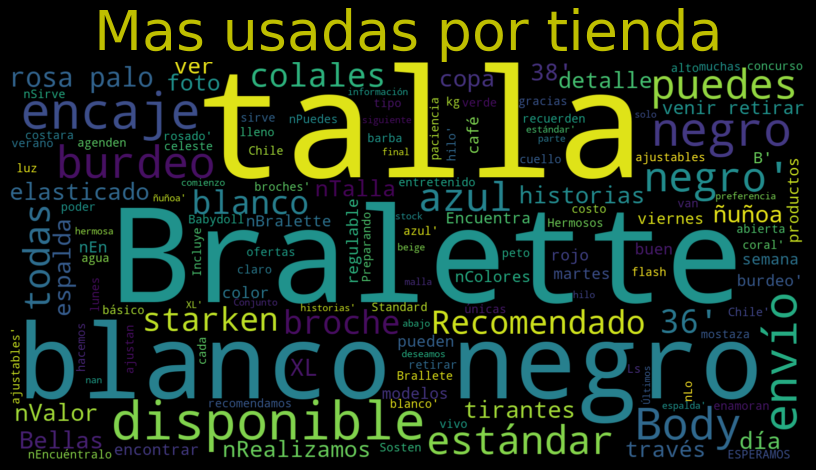

In [95]:

title = 'Mas usadas por tienda'
temp = df4['description']

new_stop = set(stopwords)
new_stop.update([x.lower() for x in list(df4['description'][df4['description'].notnull()].unique()) + ['nDisponible','nRecomendado']])

cloud(text= temp.values, title=title, stopwords=new_stop)

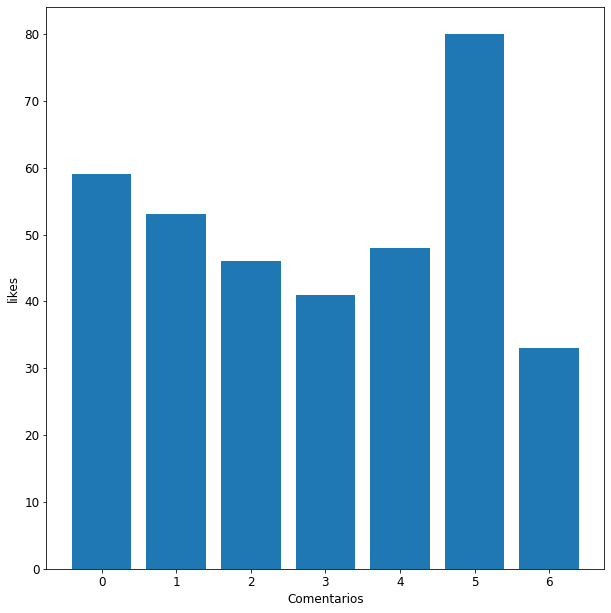

In [96]:
plt.bar(x='comments', height='likes',data=df4)
plt.xlabel('Comentarios')
plt.ylabel('likes')
plt.show()